<span style="font-size:2em;">**The Complete Pokémon Dataset**</span>

This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from [serebii](http://serebii.net/). 

**Features:**
- abilities: A stringified list of abilities that the Pokemon is capable of having.
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type.
- attack: The Base Attack of the Pokemon.
- base_egg_steps: The number of steps required to hatch an egg of the Pokemon.
- base_happiness: Base Happiness of the Pokemon.
- base_total: Sum of hp, attack, defense, sp_attack, sp_defense and speed.
- capture_rate: Capture Rate of the Pokemon.
- classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex.
- defense: The Base Defense of the Pokemon.
- experience_growth: The Experience Growth of the Pokemon.
- height_m: Height of the Pokemon in metres.
- hp: The Base HP of the Pokemon.
- japanese_name: The Original Japanese name of the Pokemon.
- name: The English name of the Pokemon.
- percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
- pokedex_number: The entry number of the Pokemon in the National Pokedex.
- sp_attack: The Base Special Attack of the Pokemon.
- sp_defense: The Base Special Defense of the Pokemon.
- speed: The Base Speed of the Pokemon.
- type1: The Primary Type of the Pokemon.
- type2: The Secondary Type of the Pokemon.
- weight_kg: The Weight of the Pokemon in kilograms.
- generation: The numbered generation which the Pokemon was first introduced.
- is_legendary: Denotes if the Pokemon is legendary.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

from ast import literal_eval

In [2]:
%matplotlib inline
sns.set_style("darkgrid")

# Descriptive statistics

Let's load the dataset, look at the descriptive statistics and check for missing values.

In [3]:
pokemon_df = pd.read_csv("../data/raw/pokemon.csv")

In [4]:
print(f"Unique primary types: {pokemon_df['type1'].nunique()}")
print(f"Unique secondary types: {pokemon_df['type2'].nunique()}")

Unique primary types: 18
Unique secondary types: 18


In [47]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.250000,0.5,1.00000,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.250000,1.0,1.00000,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.000000,1.0,1.00000,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.000000,0.5,1.00000,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.250000,1.0,1.00000,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.000000,0.5,1.00000,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.250000,0.5,1.00000,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.250000,1.0,1.00000,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.000000,1.0,1.00000,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.250000,0.5,1.00000,1.0,4.0


In [6]:
pokemon_df.isnull().sum()[pokemon_df.columns[pokemon_df.isnull().any()]]

height_m            20
percentage_male     98
type2              384
weight_kg           20
dtype: int64

# Data processing

Before the exploratory data analysis, let's discard unnecessary columns from the dataset and create some new ones that will be useful during the analysis.

In [7]:
pokemon_df.drop(['japanese_name', 'pokedex_number', 'base_egg_steps', 'classfication', 'percentage_male'], axis=1, inplace=True)

The first feature is created by joining type1 and type2 into a single type.

In [8]:
pokemon_df["type"] = pokemon_df.apply(
    lambda x: x["type1"] if pd.isnull(x["type2"]) else f"{x['type1']}_{x['type2']}", 
    axis=1)

The second is just an auxiliary column to check if a pokémon has a second type.

In [9]:
pokemon_df["has_second_type"] = pokemon_df.apply(
    lambda x: False if pd.isnull(x["type2"]) else True, 
    axis=1)

Since the abilities column is a stringified list, there is the need to convert it back to a list.

In [10]:
pokemon_df["abilities"] = pokemon_df.apply(lambda x: literal_eval(x["abilities"]), axis=1)

The next step is to create a column with the number of abilities.

In [11]:
pokemon_df["n_abilities"] = pokemon_df.apply(lambda x: len(x["abilities"]), axis=1)

We're also creating the BMI column, which represents the Body Mass Index of each Pokémon. The formula is calculated by dividing the weight in kilograms by the square of the height in meters.

In [12]:
pokemon_df["bmi"] = pokemon_df.apply(lambda x: x['weight_kg']/(x['height_m']**2), axis=1)

Finally, Minior has two capture rates, so we are just ignoring such value by assigning it to NaN and changing the column type to numeric.

In [20]:
pokemon_df["capture_rate"].replace({'30 (Meteorite)255 (Core)': np.nan}, inplace=True)
pokemon_df["capture_rate"] = pd.to_numeric(pokemon_df["capture_rate"])

# Data Visualization

**How many new pokémon are there per generation?**

To answer this, we are going to use a count plot, which can be thought of as a histogram across a categorical variable.

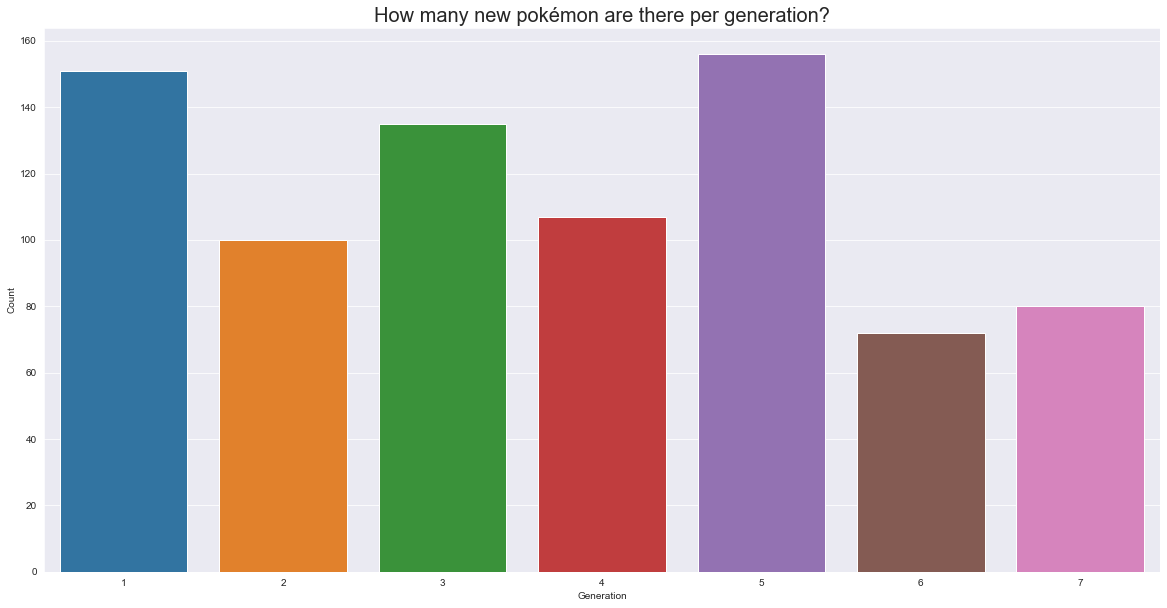

In [21]:
plt.figure(figsize=(20,10))
ax = sns.countplot(pokemon_df.generation)
ax.set_title("How many new pokémon are there per generation?", size=20)
ax.set(xlabel="Generation", ylabel="Count");

Odd generations have more new pokémon compared to even ones.

**What are the most prevalent primary types?**

Let's use a treemap to visualize this. A treemap allows to see what proportion each element has compared to the whole, by displaying each element as a rectangle.

In [22]:
type1_value_counts = pokemon_df["type1"].value_counts()

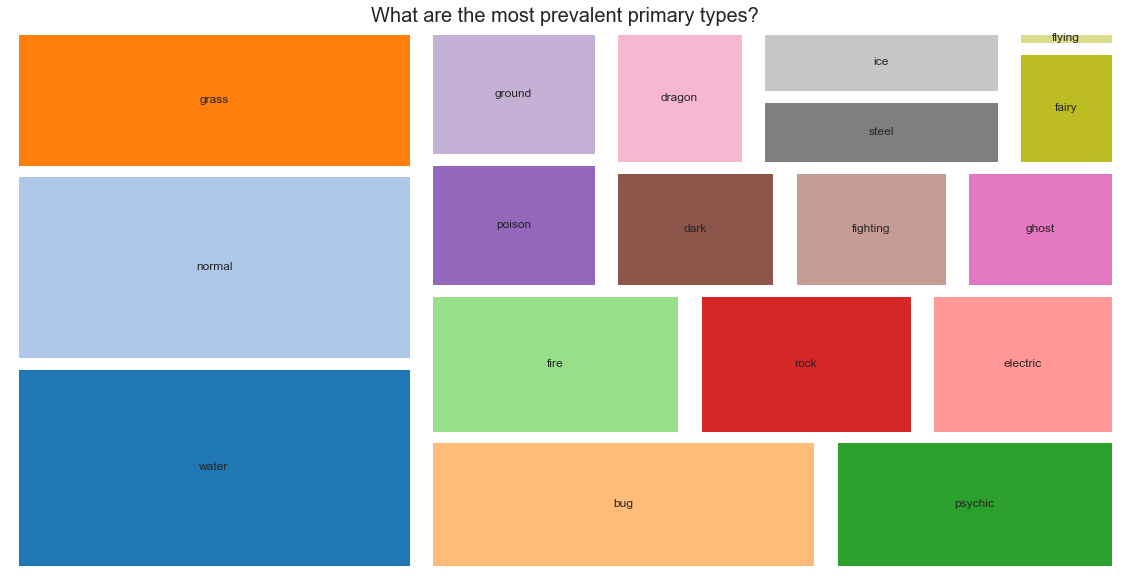

In [23]:
plt.figure(figsize=(20,10))
ax = squarify.plot(type1_value_counts, 
              label=type1_value_counts.index,
              color=sns.color_palette("tab20", len(type1_value_counts)),
              pad=1,
              text_kwargs={'fontsize': 12})
ax.set_title("What are the most prevalent primary types?", size=20)
plt.axis('off');

Water type pokémon are the most common, followed by Normal and Grass.

**What about secondary types?**

For this we are using a stacked bar chart. A bar chart is a type of plot where the length of each bar is proportional to the value of the item that it represents. It is commonly used to compare the values of a variable at a given point in time. 

In a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale. 

In [24]:
print(f"To note that a very large number of Pokémon do not have a secondary type: {pokemon_df['type2'].isnull().sum()}")

To note that a very large number of Pokémon do not have a secondary type: 384


In [25]:
type2_value_counts = pokemon_df["type2"].value_counts()
types_df = pd.concat([type1_value_counts, type2_value_counts], axis=1)

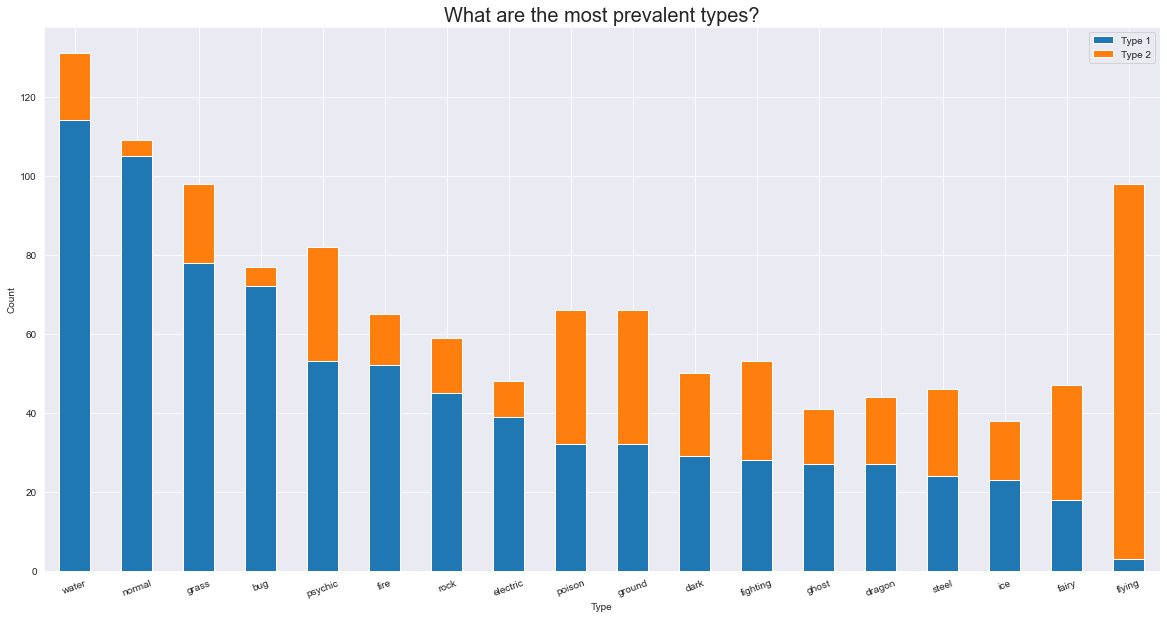

In [26]:
ax = types_df.plot(kind="bar", stacked=True, figsize=(20,10))
ax.set_title("What are the most prevalent types?", size=20)
ax.set(xlabel="Type", ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20);
ax.legend(["Type 1", "Type 2"]);

Flying type is the most common type 2, followed by Poison, Ground and Fairy types.

**What are the most common type combinations?**

A horizontal bar chart seems to be a good choice for visualizing this.

In [29]:
top15_type_counts = pokemon_df[pokemon_df["has_second_type"]]["type"].value_counts()[:15]

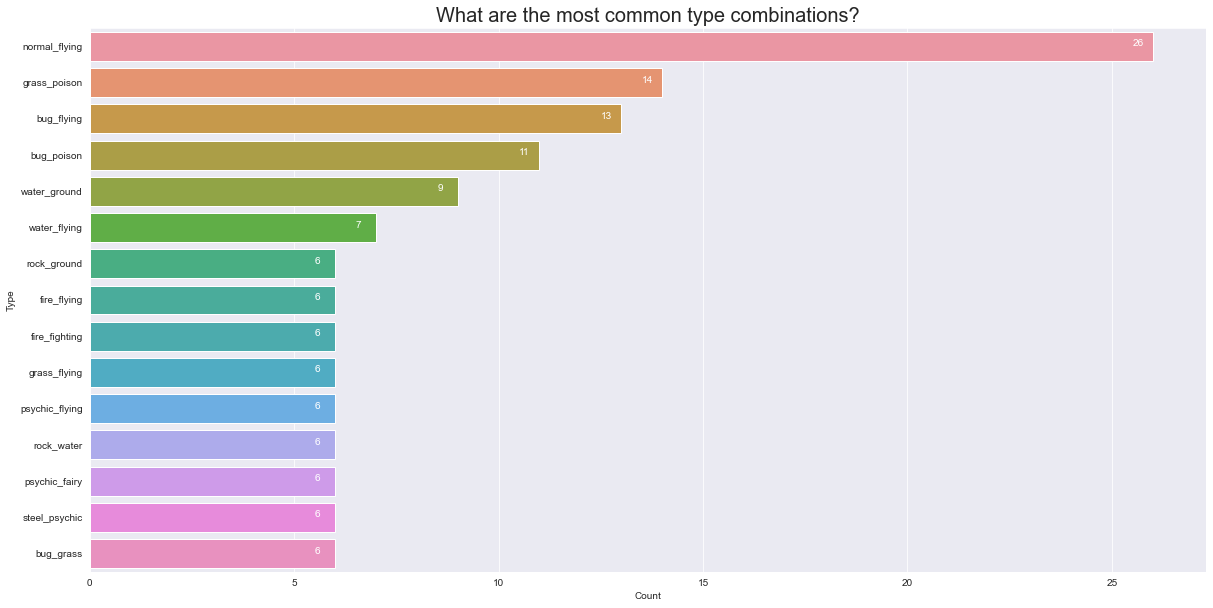

In [30]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=top15_type_counts.index, x=top15_type_counts.values, orient='h')
ax.set_title("What are the most common type combinations?", size=20)
ax.set(ylabel="Type", xlabel="Count");

# Annotate value labels to each type
for index, value in enumerate(top15_type_counts): 
    plt.annotate(format(int(value), ','), xy=(value-0.5, index), color='white') 

Normal + flying, grass + poison and bug + flying are the most common type combinations.

**What are the most common types of legendary Pokémon?**

Let's use a horizontal bar chart again.

In [31]:
legendary_pokemon = pokemon_df[pokemon_df['is_legendary'] == True]
legendary_pokemon_types_top5 = legendary_pokemon["type"].value_counts()[:5]

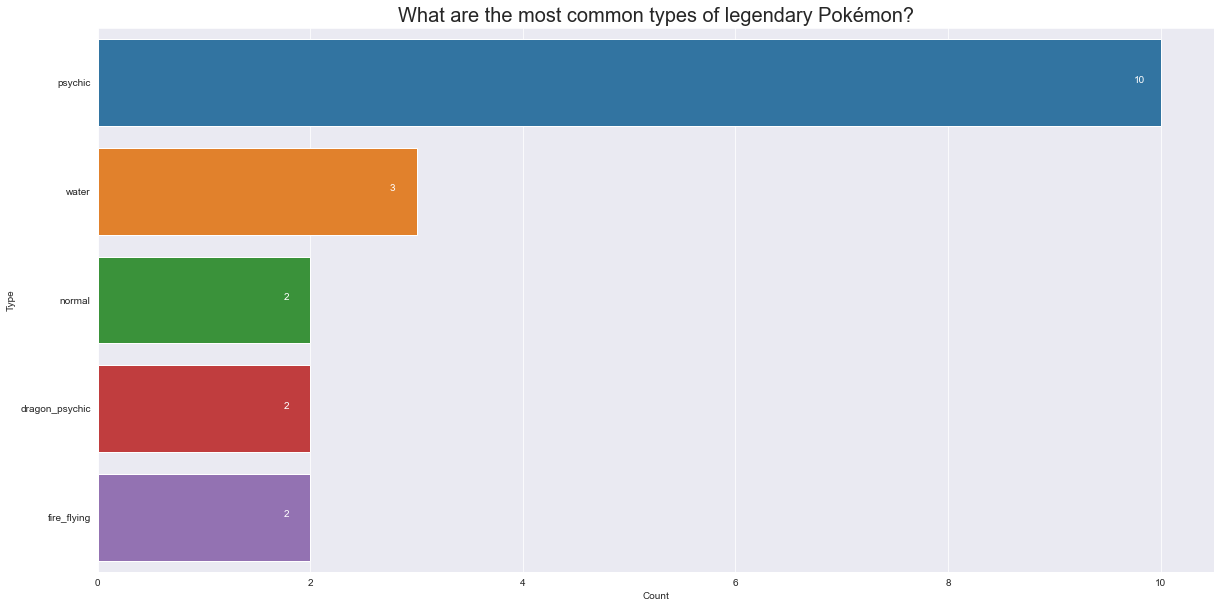

In [32]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=legendary_pokemon_types_top5.index, x=legendary_pokemon_types_top5.values, orient='h')
ax.set_title("What are the most common types of legendary Pokémon?", size=20)
ax.set(xlabel="Count", ylabel="Type")

# Annotate value labels to each type
for index, value in enumerate(legendary_pokemon_types_top5): 
    plt.annotate(format(int(value), ','), xy=(value-0.25, index), color='white') 

Psychic is the most common type of legendary Pokémons, followed by water.


**How does type1 vary across generations?**

To show the increment of each type1 over generations, a stacked bar chart is a good choice.

In [37]:
type1_by_generation_group = pokemon_df.groupby(['generation', 'type1'])['name'].count().to_frame().reset_index()
type1_by_generation_group.rename(columns={"name": "count"}, inplace=True)

type1_by_generation_dict  = {}
for generation in list(type1_by_generation_group["generation"].unique()):
    current_generation = []
    for type1 in type1_by_generation_group["type1"].unique():
        try:
            current_generation.append(
                type1_by_generation_group.loc[(type1_by_generation_group['generation']==generation) 
                                        & (type1_by_generation_group["type1"] == type1)]["count"].values[0])
        except IndexError:
            current_generation.append(0)
    type1_by_generation_dict[f"Generation {generation}"] = current_generation

type1_by_generation = pd.DataFrame(type1_by_generation_dict, index= type1_by_generation_group["type1"].unique())

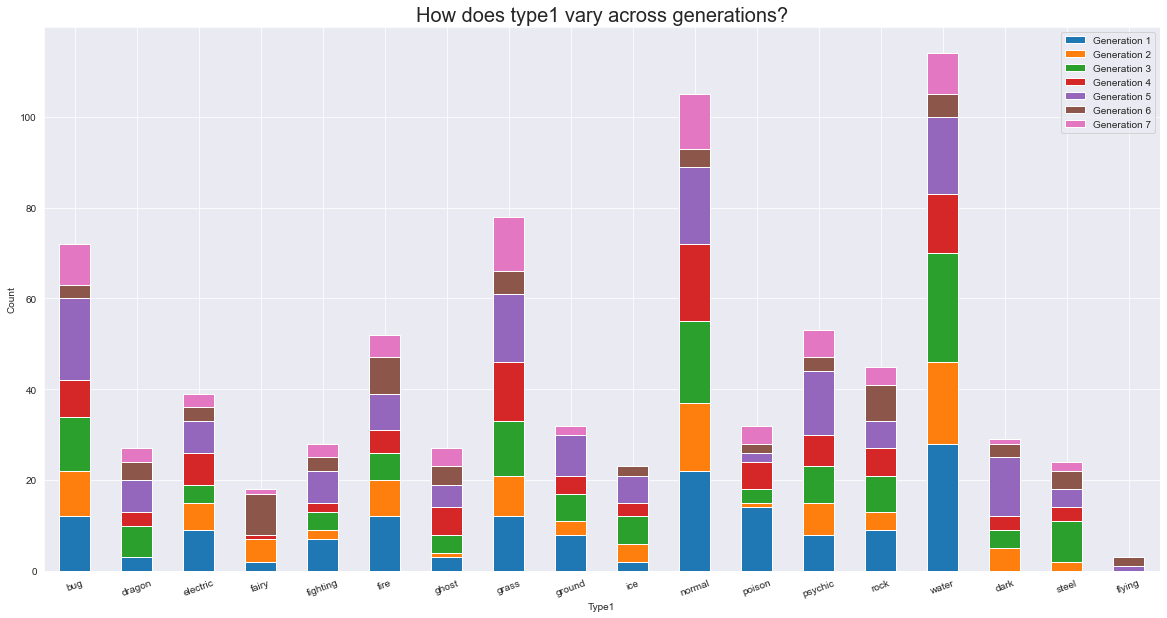

In [38]:
ax = type1_by_generation.plot(kind="bar", stacked=True, figsize=(20,10))
ax.set_title("How does type1 vary across generations?", size=20)
ax.set(xlabel="Type1", ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20);

To note an unusual amount of fairy type Pokémon in generation 6 and dark and psychic in generation 5. 

A few types doesn't even exist in some generations, like fairy in generation 3 and ground in generation 6.

**Which generation has the easiest pokémon to catch?**

For this question we are going to use a box plot. Boxplots compare the distributions of a numeric variable grouped according to a categorical variable.

A boxplot is a way of statistically representing the distribution of given data through 5 main dimensions. The first dimension is the minimum, and its value can be obtained by subtracting 1.5 times the IQR, where IQR is the interquartile range from the first quartile. The second dimension is the first quartile which is 25% of the way through the sorted data. In other words, 1/4 of the data points are less than this value. The third dimension is the median. The fourth dimension is the third quartile, which is 75% through the sorted data. In other words, 3/4 of the data points are less than this value. And the final dimension is the maximum, which is the highest number in the sorted data where maximum equals the third quartile summed with 1.5 multiplied by IQR. Finally, boxplots also display outliers as individual dots that occur outside the upper and lower extremes.

In [39]:
Image(url='../reports/figures/boxplot_example.png', width=400, height=400)

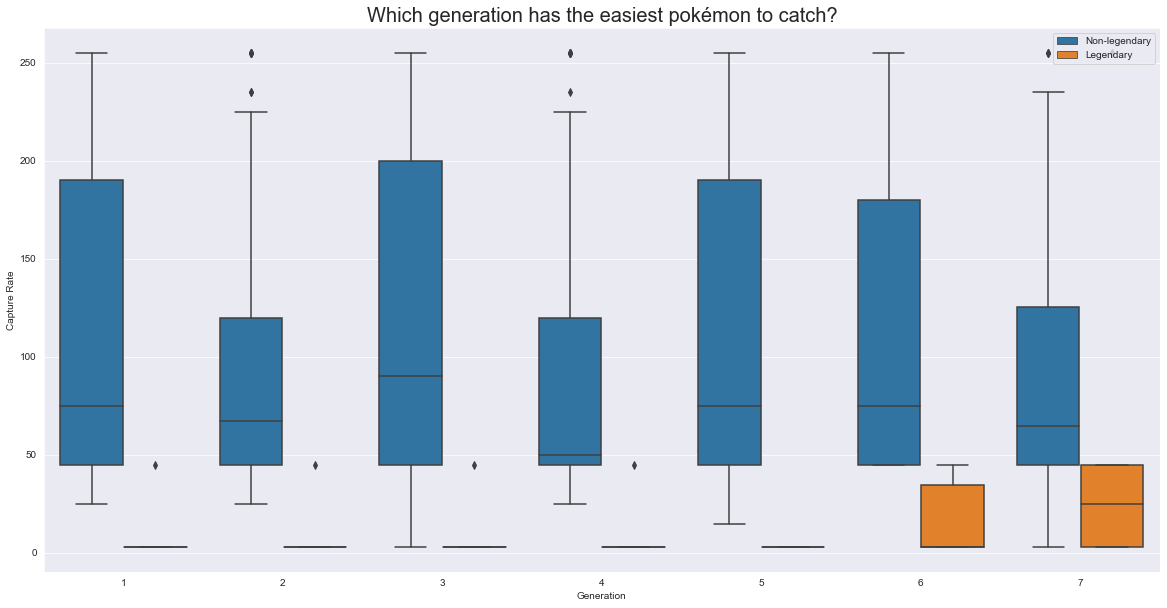

In [40]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='generation',y='capture_rate', hue="is_legendary", data = pokemon_df)
ax.set_title("Which generation has the easiest pokémon to catch?", size=20)
ax.set(xlabel="Generation", ylabel="Capture Rate")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-legendary", "Legendary"], loc='upper right');

Generation 3 has the easiest pokémon to catch, while generation 4 has the hardest.

Legendary are easier to capture from generation 6 onwards.

**Which type has the easiest pokémon to catch?**

As in the previous question, we are going to use a boxplot.

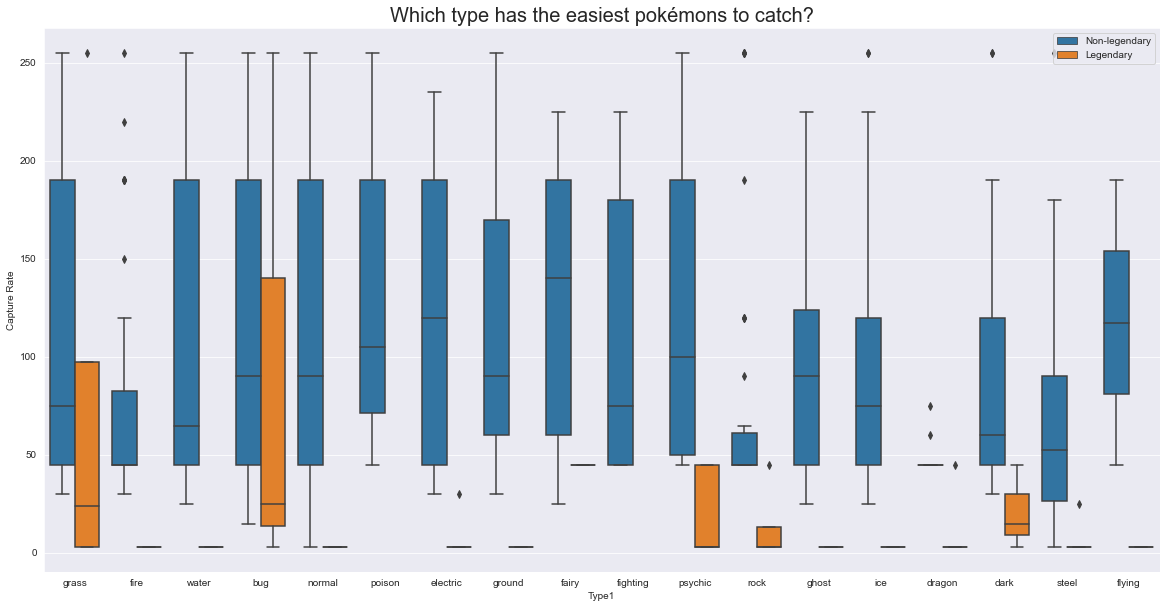

In [41]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='type1',y='capture_rate', hue="is_legendary", data = pokemon_df)
ax.set_title("Which type has the easiest pokémons to catch?", size=20)
ax.set(xlabel="Type1", ylabel="Capture Rate")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-legendary", "Legendary"], loc='upper right');

Fairy type has the easiest pokémon to catch, while dragon has the hardest.

The easiest legendary pokémon to catch are of type grass and bug.

**How many abilities do Pokémon usually have?**

The question gives a hint of what kind of plot is adequate, doesn't it? Count plot, of course.

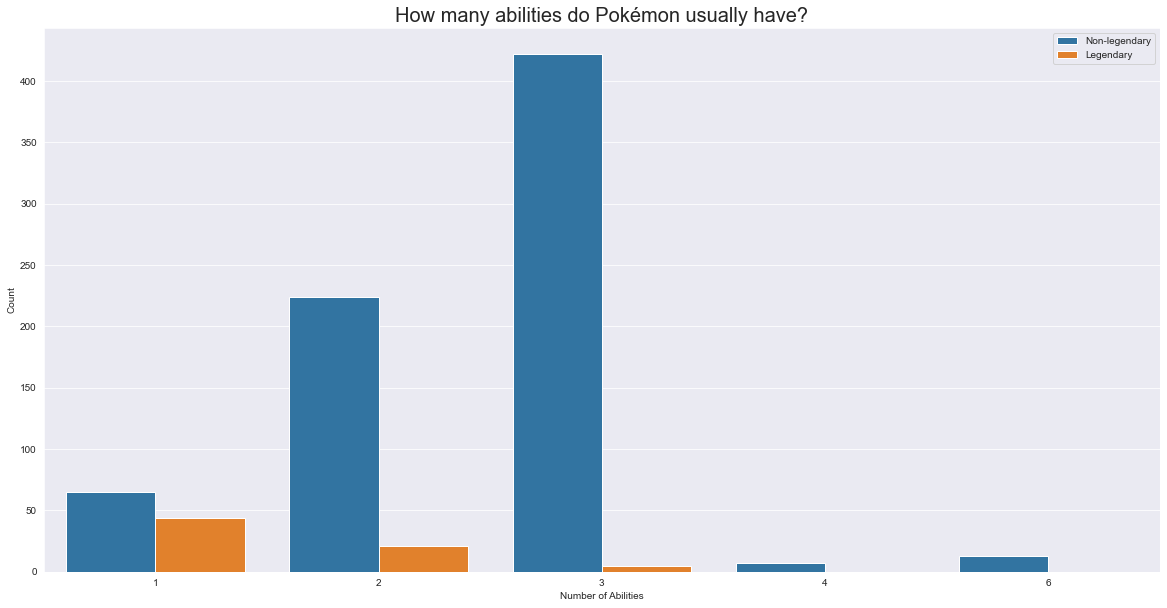

In [42]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=pokemon_df, x="n_abilities", hue="is_legendary")
ax.set_title("How many abilities do Pokémon usually have?", size=20)
ax.set(xlabel="Number of Abilities", ylabel="Count");
ax.legend(["Non-legendary", "Legendary"], loc='upper right');

3 is the most common number of abilities for non-legendary pokémon, while most legendary pokémon only have 1 ability.

**What are the heavier and taller Pokémon?**

For this we are plotting a scatter plot. A scatter plot is a type of plot that displays values pertaining to typically two variables against each other. Usually it is a dependent variable to be plotted against an independent variable in order to determine if any correlation between the two variables exists. If color-coded, it can also show the relationship with a third categorical variable.

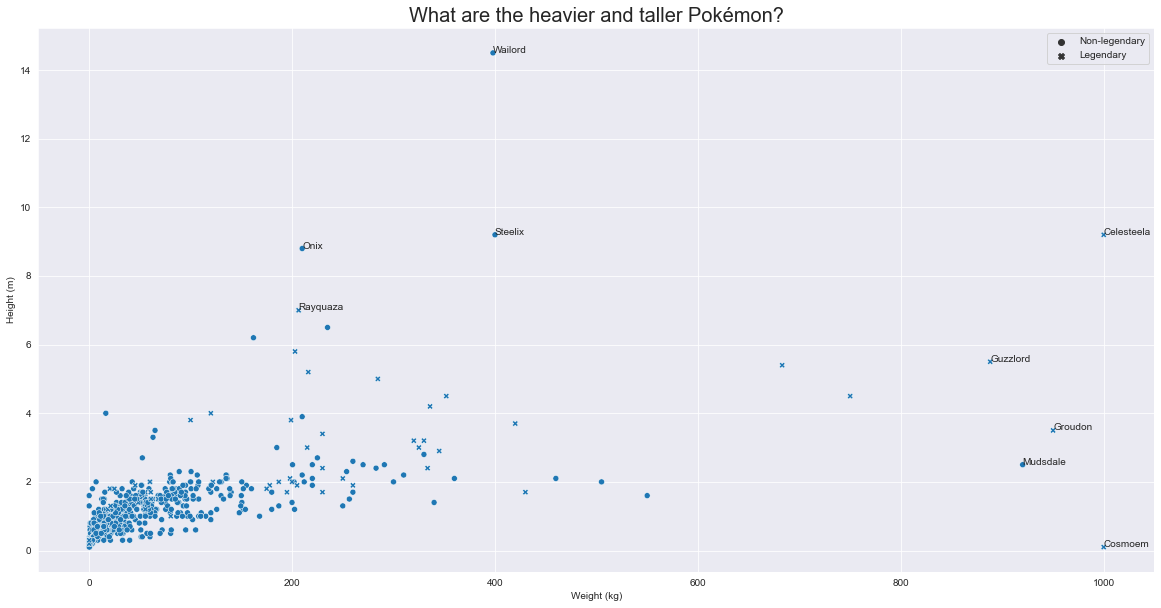

In [44]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x = 'weight_kg', y = 'height_m', style ='is_legendary', data=pokemon_df)
ax.set_title("What are the heavier and taller Pokémon?", size=20)
ax.set(xlabel="Weight (kg)", ylabel="Height (m)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-legendary", "Legendary"]);

top5_weight_height_merged = pd.concat([pokemon_df.nlargest(5, 'height_m'), pokemon_df.nlargest(5, 'weight_kg')]).drop_duplicates(subset=['name'])
for index, row in top5_weight_height_merged.iterrows():
    plt.annotate(row['name'], xy=(row['weight_kg'], row['height_m']), fontsize=10)

2/5 of the tallest Pokémon are legendary, while 4/5 of the heavier Pokémon are legendary.

Celesteela is the only Pokémon in the top 5 in weight and height.

**Which Pokemon has the highest BMI?**

Barplot is the chosen one to answer this question!

In [ ]:
top10_highest_bmi = pokemon_df.loc[:, ["name", "bmi"]].sort_values(by="bmi", ascending=False)[:10]
plt.figure(figsize=(20,10))
ax = sns.barplot(y=top10_highest_bmi["bmi"], x=top10_highest_bmi["name"])
ax.set_title("Which Pokemon has the highest BMI?", size=20)
ax.set(xlabel="Name", ylabel="BMI");

Cosmoem is a clear winner!

**Which Pokemon has the lowest BMI?**

In [ ]:
top10_highest_bmi = pokemon_df.loc[:, ["name", "bmi"]].sort_values(by="bmi", ascending=True)[:10]
plt.figure(figsize=(20,10))
ax = sns.barplot(y=top10_highest_bmi["bmi"], x=top10_highest_bmi["name"])
ax.set_title("Which Pokemon has the lowest BMI?", size=20)
ax.set(xlabel="Name", ylabel="BMI");

Haunter and its previous form are the winners, followed by Dratini and its evolution (Dragonair).

**Which is the best generation?**

Boxplot is a good choice for this, since we are going to plot the distribution of the base total stat.

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='generation',y='base_total', hue='is_legendary',data = pokemon_df)
ax.set_title("Which is the best generation?", size=20)
ax.set(xlabel="Generation", ylabel="Base Total")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-legendary", "Legendary"]);

Generation 4 has the best pokémon in general, while generation 3 has the best legendary pokémon in general.

**How are attributes related?**

The best way to visualize this is by using a heatmap. A heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

In [ ]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap((pokemon_df[pokemon_df["is_legendary"]==0].loc[:,['hp','sp_attack','sp_defense','attack','defense','speed']]).corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('Correlation Between Pokémon Attributes (Non-Legendary)', size = 20);

* Regarding non-legendary pokémon:
    
    - There seems to be a positive relationship between hp and sp_attack, sp_defense and attack. Such relationship is less significant for defense, which is kind of surprising, I thought a defensive Pokemon would have a higher hp.
    - Attack has the strongest relationship with defense.
    - Defense has the strongest relationship with sp_defense.
    - Speed has a very weak negative relationship with defense.

In [ ]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap((pokemon_df[pokemon_df["is_legendary"]==1].loc[:,['hp','sp_attack','sp_defense','attack','defense','speed']]).corr(),
            annot= True,
            fmt = ".2f",
            vmin = -1,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('Correlation Between Pokémon Attributes (Legendary)', size = 20);

Pretty different, isn't it?

Regarding legendary pokémon, the relationships between attack and defense changed to negative. Plus, the relationship between attack and speed and defense and speed got stronger (positive and negative, respectively). 

**Which is the best type?**

In [ ]:
non_legendary_pokemon_attributespokemon_attributes = pokemon_df[pokemon_df["is_legendary"]==0].groupby(['type1']).median()[["attack", "sp_attack", "defense", "sp_defense", "hp", "speed", "base_total"]]

In [ ]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(non_legendary_pokemon_attributespokemon_attributes,
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 150,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap="YlOrRd")
ax.set_title('Median of Attributes by Type (Non-Legendary)', size = 20)
ax.set(ylabel="Type1", xlabel="Attribute");

- Top 5 types - attack: fighting, dragon, ground, dark, steel
- Top 5 types - sp_attack: psychic, electric, fairy, fire, ghost
- Top 5 types - defense: steel, rock, ground, ghost, ice
- Top 5 types - sp_defense: steel, fairy, ghost, psychic, dragon
- Top 5 types - hp: fairy, normal, fighting, ice, ground
- Top 5 types - speed: flying, electric, fire, dark, dragon
- Top 5 types - base_total: ghost, steel, fighting, fairy and ice

Good types to attack are electric, fire, dark and dragon, since they are in top5 attack or sp_attack and speed.

Good types to defend are fairy, ice and ground, since they are in top5 defense or sp_defense and hp.

To highlight ground, which is in top5 of attack, defense and hp. However, it is not in the top5 base_total, due to its low values for sp_attack, sp_defense and speed.

In [ ]:
legendary_pokemon_attributes = pokemon_df[pokemon_df["is_legendary"]==1].groupby(['type1']).median()[["attack", "sp_attack", "defense", "sp_defense", "hp", "speed", "base_total"]]

In [ ]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(legendary_pokemon_attributes,
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 150,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap="YlOrRd")
ax.set_title('Median of Attributes by Type (Legendary)', size = 20)
ax.set(ylabel="Type1", xlabel="Attribute");

- Top 5 types - attack: ground, bug, fairy, normal, dragon
- Top 5 types - sp_attack: dragon, dark, fairy, ground, electric
- Top 5 types - defense: ground, steel, normal, dragon, ghost
- Top 5 types - sp_defense: ice, water, normal, psychic, rock
- Top 5 types - hp: ghost, dark, fairy, normal, dragon
- Top 5 types - speed: flying, normal, grass, rock, electric
- Top 5 types - base_total: dragon, ground, fairy, ghost, normal

Good types to attack are normal and electric, since they are in top5 attack or sp_attack and speed.

Good types to defend are ghost, normal and  dragon, since they are in top5 defense or sp_defense and hp.

To highlight normal, which is in top5 of attack, defense, sp_defense, hp and speed. Nonetheless, it's only the fifth in relation to base_total.

**Let's analyze type effectiveness**

In [55]:
against_columns = ["against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy", "against_fight", "against_fire",
 "against_flying", "against_ghost", "against_grass", "against_ground", "against_ice", "against_normal", "against_poison", 
 "against_psychic", "against_rock", "against_steel", "against_water"]

pokemon_type_effectiveness = pokemon_df.groupby(['type1']).median()[against_columns]

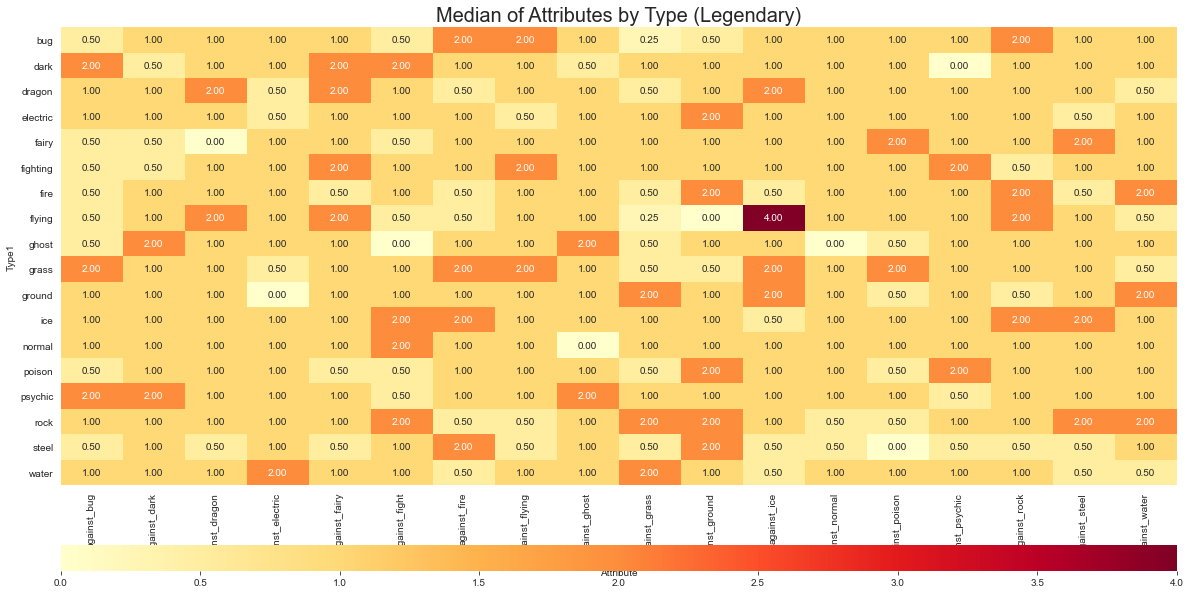

In [56]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(pokemon_type_effectiveness,
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 4,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap="YlOrRd")
ax.set_title('Median of Attributes by Type (Legendary)', size = 20)
ax.set(ylabel="Type1", xlabel="Attribute");

To highlight that electric is only weak (against <=2) against ground and normal against fighting.
Curious that ghost is weak against ghost and that flying is extremely weak against ice. 

* There are some types that are pretty useless against:
    - psychic against dark
    - dragon against fairy 
    - ground against flying
    - normal against ghost
    - fighting against ghost
    - electric against ground
    - poison against steel
    
Take a look at [here](https://pokemondb.net/type) to validate these results.

**Which is the best pokemon?**

In [ ]:
top10_pokemon_base_total = pokemon_df.sort_values(by="base_total", ascending=False).reset_index()[:10]

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=top10_pokemon_base_total["name"], x=top10_pokemon_base_total["base_total"], orient='h')
ax.set_title("Which is the best pokemon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")

# Annotate value labels to each type
for index, row in top10_pokemon_base_total.iterrows(): 
    plt.annotate(row["base_total"], xy=(row["base_total"]-20, index), color='white') 

And we have a tie! Let's compare Mewtwo and Rayquaza in a fancier way, by using a radar chart.
A radar chart allows to visualize one or more series of values over multiple quantitative variables. Each variable has its own axis, all axes are joined in the center of the figure.

In [ ]:
subjects=["attack", "sp_attack", "defense", "sp_defense", "hp", "speed"]
mewtwo= top10_pokemon_base_total[top10_pokemon_base_total["name"] == "Mewtwo"][["attack", "sp_attack", "defense", "sp_defense", "hp", "speed"]].values.tolist()[0]
rayquaza = top10_pokemon_base_total[top10_pokemon_base_total["name"] == "Rayquaza"][["attack", "sp_attack", "defense", "sp_defense", "hp", "speed"]].values.tolist()[0]

angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
subjects.append(subjects[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])

In [ ]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)
#Alice Plot
ax.plot(angles,mewtwo, 'o-', color='g', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='g')
#Bob Plot
ax.plot(angles,rayquaza, 'o-', color='orange', linewidth=1, label='Rayquaza')
ax.fill(angles, rayquaza, alpha=0.25, color='orange')
ax.set_thetagrids(angles[:-1] * 180/np.pi, subjects[:-1], fontsize=12)
plt.grid(True)
plt.legend(loc="upper right", fontsize=12)
ax.set_title("Mewtwo vs Rayquaza", fontsize=20, pad=50);

Rayquaza has better attack and defense while Mewtwo is better considering the remaining attributes.

# References

1. [Pokemon Data Visualization](https://www.kaggle.com/shreekant009/pokemon-data-visualization/notebook)
2. [Data Visualization - Pokemon Data](https://www.kaggle.com/lakshyaag/data-visualization-pokemon-data)
3. [Pokémon! Kaggle Learn Edition](https://www.kaggle.com/aplayer98/pok-mon-kaggle-learn-edition)
4. [DataVis Battle Entry: Getting to know my Pokémon](https://towardsdatascience.com/reddit-datavis-entry-getting-to-know-my-pok%C3%A9mon-e0bcf4b4b803)
5. [GgPlot ‘Em All | Pokemon](https://towardsdatascience.com/exploratory-analysis-of-pokemons-using-r-8600229346fb)
6. [Radar Chart](https://www.python-graph-gallery.com/radar-chart)
7. [How to Create a Radar Chart in Python](https://towardsdatascience.com/how-to-create-a-radar-chart-in-python-36b9ebaa7a64)